In [ ]:
#@title Setup & Import Library

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#@title Load Dataset Soybean (UCI)

# Dataset loaded from public UCI repository (no local hardcoded path)
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-small.data"

columns = [
    "date","plant-stand","precip","temp","hail","crop-hist","area-damaged",
    "severity","seed-tmt","germination","plant-growth","leaves","leafspots-halo",
    "leafspots-marg","leafspot-size","leaf-shread","leaf-malf","leaf-mild",
    "stem","lodging","stem-cankers","canker-lesion","fruiting-bodies",
    "external-decay","mycelium","int-discolor","sclerotia","fruit-pods",
    "fruit-spots","seed","mold-growth","seed-discolor","seed-size","shriveling",
    "roots","label"
]

df = pd.read_csv(DATA_URL, header=None, names=columns)

print("Dataset loaded!")
print("Shape:", df.shape)
df.head()


Dataset loaded!
Shape: (47, 36)


,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,label
0,4,0,2,1,1,1,0,1,0,2,...,0,0,4,0,0,0,0,0,0,D1
1,5,0,2,1,0,3,1,1,1,2,...,0,0,4,0,0,0,0,0,0,D1
2,3,0,2,1,0,2,0,2,1,1,...,0,0,4,0,0,0,0,0,0,D1
3,6,0,2,1,0,1,1,1,0,0,...,0,0,4,0,0,0,0,0,0,D1
4,4,0,2,1,0,3,0,2,0,2,...,0,0,4,0,0,0,0,0,0,D1


In [ ]:
#@title Data Cleaning & Encoding

# Check missing values
print(df.isnull().sum())

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

X = df.drop("label", axis=1)
y = df["label"]


date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
label              0
dtype: int64


In [ ]:
#@title Train Test Split & Scaling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
#@title MODEL 1 — BASELINE (Naive Bayes)

start = time.time()

model_baseline = GaussianNB()
model_baseline.fit(X_train, y_train)
y_pred_nb = model_baseline.predict(X_test)

end = time.time()

print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print("Training time:", end - start, "seconds")


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Training time: 0.01288914680480957 seconds


In [ ]:
#@title MODEL 2 — ADVANCED ML (Random Forest)

start = time.time()

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

end = time.time()

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Training time:", end - start, "seconds")


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Training time: 0.2663846015930176 seconds


In [ ]:
#@title MODEL 3 — DEEP LEARNING (MLP)

num_classes = len(np.unique(y))

y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

model_dl = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model_dl.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

start = time.time()

history = model_dl.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=30,
    batch_size=16,
    verbose=1
)

end = time.time()
print("Training time:", end - start, "seconds")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.1566 - loss: 1.8120 - val_accuracy: 0.1250 - val_loss: 1.3991
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.2421 - loss: 1.5298 - val_accuracy: 0.5000 - val_loss: 1.2836
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.3111 - loss: 1.5117 - val_accuracy: 0.5000 - val_loss: 1.1744
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2256 - loss: 1.4226 - val_accuracy: 0.5000 - val_loss: 1.0707
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.4447 - loss: 1.2201 - val_accuracy: 0.5000 - val_loss: 0.9750
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.5783 - loss: 1.0683 - val_accuracy: 1.0000 - val_loss: 0.8857
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7996 - loss: 0.9206 - val_accuracy: 1.0000 - val_loss: 0.8034
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.7141 - loss: 0.9286 - val_accuracy: 1.0000 - val_loss: 0.7275

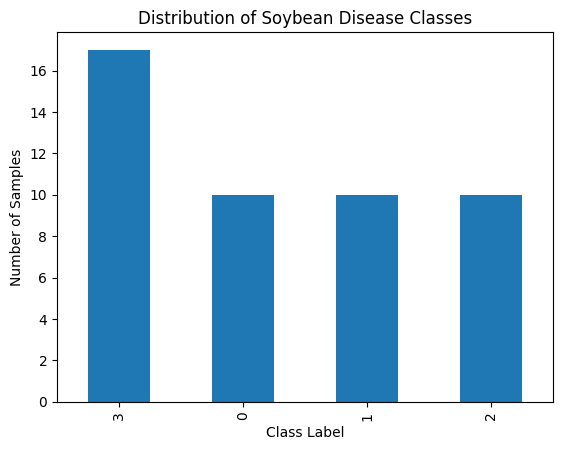

Jumlah data per kelas:
label
3    17
0    10
1    10
2    10
Name: count, dtype: int64


In [ ]:
#@title DISTRIBUSI KELAS (TARGET VARIABLE)

# =========================
# EDA 1: CLASS DISTRIBUTION
# =========================

plt.figure()
y.value_counts().plot(kind='bar')
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Soybean Disease Classes")
plt.show()

print("Jumlah data per kelas:")
print(y.value_counts())


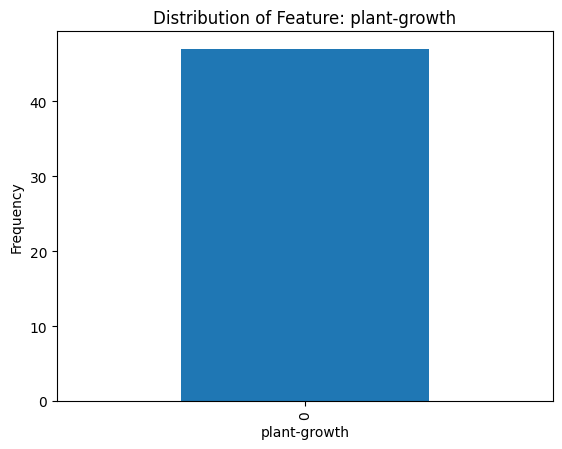

Distribusi nilai fitur 'plant-growth':
plant-growth
0    47
Name: count, dtype: int64


In [ ]:
#@title EDA 2 — FREKUENSI NILAI FITUR (FEATURE ANALYSIS)

# =========================
# EDA 2: FEATURE VALUE DISTRIBUTION
# =========================

feature_name = "plant-growth"

plt.figure()
df[feature_name].value_counts().plot(kind='bar')
plt.xlabel(feature_name)
plt.ylabel("Frequency")
plt.title(f"Distribution of Feature: {feature_name}")
plt.show()

print(f"Distribusi nilai fitur '{feature_name}':")
print(df[feature_name].value_counts())


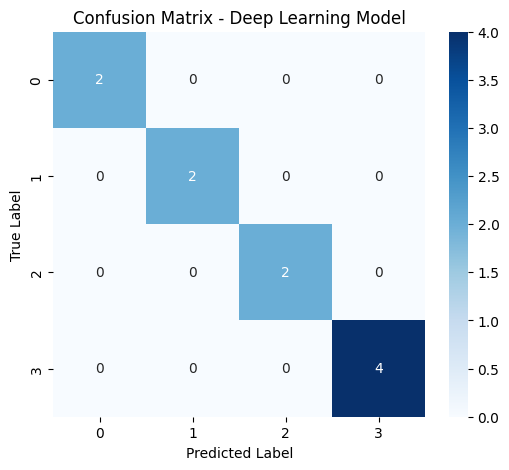

In [ ]:
#@title EDA 3 — CONFUSION MATRIX (HASIL PREDIKSI MODEL)

# =========================
# EDA 3: CONFUSION MATRIX (DL MODEL)
# =========================

import seaborn as sns

cm = confusion_matrix(y_test, y_pred_dl)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Deep Learning Model")
plt.show()


In [ ]:
# =========================
# MODEL TRAINING
# =========================

start_time = time.time()

history = model_dl.fit(
    X_train_scaled,
    y_train_cat,
    validation_split=0.2,
    epochs=30,           # >= 10 epochs (requirement)
    batch_size=16,
    verbose=1            # show training log
)

training_time = time.time() - start_time

print(f"\nTraining completed in {training_time:.2f} seconds")


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.0849 - val_accuracy: 1.0000 - val_loss: 0.0450
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 1.0000 - loss: 0.0878 - val_accuracy: 1.0000 - val_loss: 0.0406
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0864 - val_accuracy: 1.0000 - val_loss: 0.0366
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.0910 - val_accuracy: 1.0000 - val_loss: 0.0330
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0439 - val_accuracy: 1.0000 - val_loss: 0.0299
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 1.0000 - loss: 0.0506 - val_accuracy: 1.0000 - val_loss: 0.0273
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 1.0000 - loss: 0.0316 - val_accuracy: 1.0000 - val_loss: 0.0250
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 1.0000 - loss: 0.0445 - val_accuracy: 1.0000 - val_loss: 0.0231

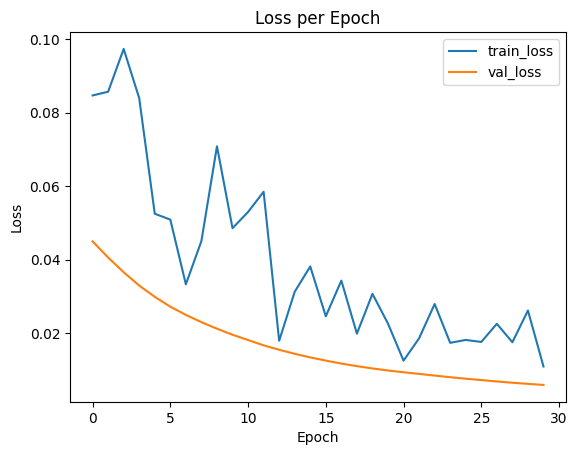

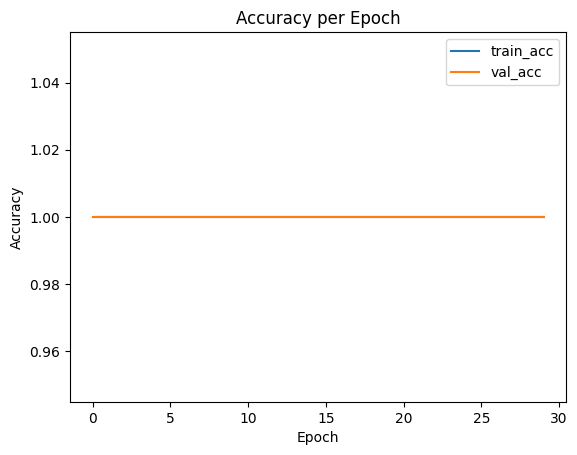

In [ ]:
#@title Plot Training History

plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
#@title Evaluasi Deep Learning Model

y_pred_dl = np.argmax(model_dl.predict(X_test_scaled), axis=1)

print("Accuracy:", accuracy_score(y_test, y_pred_dl))
print(classification_report(y_test, y_pred_dl))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

